In [62]:

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [63]:

df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


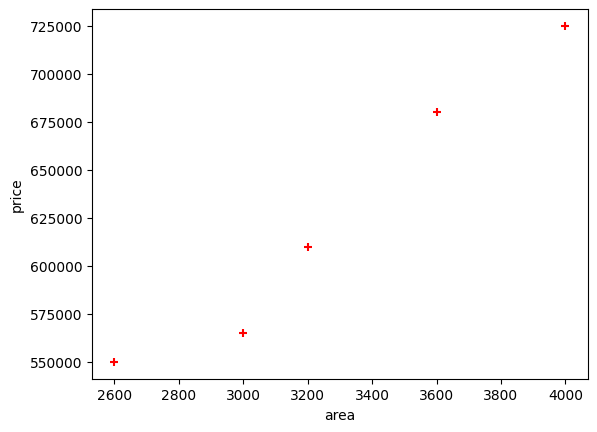

In [64]:

%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [65]:

new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [66]:

price = df.price
price

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [67]:

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

In [68]:
reg.predict([[3300]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [69]:
reg.coef_


array([135.78767123])

In [70]:
reg.intercept_


np.float64(180616.43835616432)

In [71]:

area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [72]:

p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [73]:

area_df['prices']=p
area_df


,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [74]:
area_df.to_csv("prediction.csv")



**exercise**

Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020





In [75]:
canada = pd.read_csv("canada_per_capita_income.csv")
canada.head(3)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


In [76]:
X = canada.drop('per capita income (US$)',axis='columns')
X.head(3)

,year
0,1970
1,1971
2,1972


In [77]:
y = canada['per capita income (US$)']
y.head(3)

,per capita income (US$)
0,3399.299037
1,3768.297935
2,4251.175484


In [79]:
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression()

In [80]:
reg.predict([[2020]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

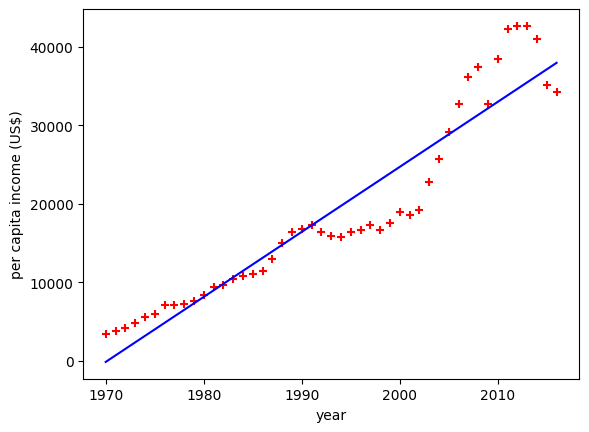

In [81]:
plt.scatter(canada.year,canada['per capita income (US$)'],color='red',marker='+')
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.plot(canada.year,reg.predict(canada[['year']]),color='blue')